## **JOIN:** Se utiliza para combinar filas de dos o más tablas, basada en una columna relacionada entre ellas

In [5]:
USE datos;

CREATE SCHEMA esquema_join;

CREATE TABLE esquema_join.Usuarios (
    User_ID INT PRIMARY KEY,
    User_Name TEXT
);


Commands completed successfully

Commands completed successfully

Total execution time: 00:00:00.003

: 1050 (42S01): Table 'usuarios' already exists

In [ ]:
CREATE TABLE esquema_join.ordenes (
    User_ID INT,
    Order_ID INT
);


In [21]:
INSERT INTO esquema_join.usuarios(User_ID, User_Name) VALUES(123,'Bob'),(124,'Alice'),(125,'Carrie');

Total execution time: 00:00:00.002

: 1062 (23000): Duplicate entry '123' for key 'usuarios.PRIMARY'

In [62]:
INSERT INTO esquema_join.ordenes(Order_ID, User_ID) VALUES(333,123),(222,123),(111,126);

Commands completed successfully

Total execution time: 00:00:00.013

In [23]:
SELECT * FROM esquema_join.usuarios;

(3 row(s) affected)

Total execution time: 00:00:01.014

User_ID,User_Name
123,Bob
124,Alice
125,Carrie


In [74]:
SELECT * FROM esquema_join.ordenes;

(3 row(s) affected)

Total execution time: 00:00:01.005

User_ID,Order_ID
123,333
123,222
126,111


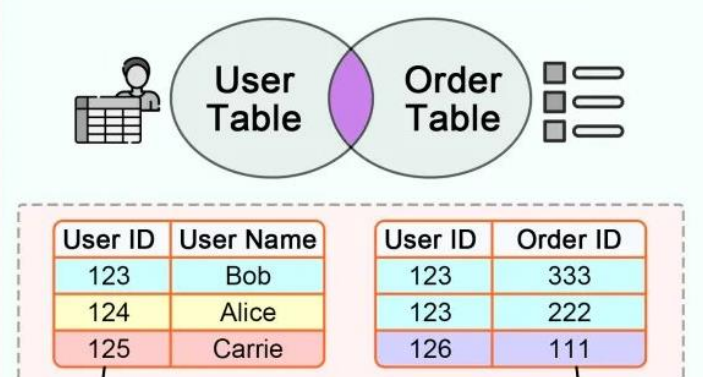

In [64]:
SELECT u.User_ID, u.User_Name, o.Order_ID
FROM esquema_join.Usuarios u
JOIN esquema_join.Ordenes o
 ON u.User_ID = o.User_ID;

(2 row(s) affected)

Total execution time: 00:00:01.008

User_ID,User_Name,Order_ID
123,Bob,333
123,Bob,222


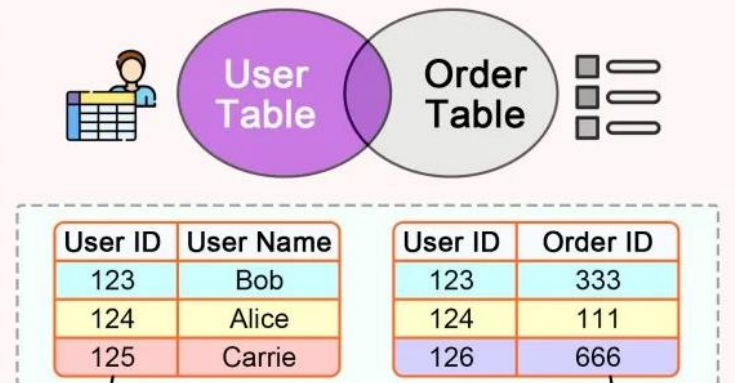

In [65]:
SELECT u.User_ID, u.User_Name, o.Order_ID
FROM esquema_join.Usuarios u
LEFT JOIN esquema_join.Ordenes o
 ON u.User_ID = o.User_ID;

(4 row(s) affected)

Total execution time: 00:00:01.013

User_ID,User_Name,Order_ID
123,Bob,222
123,Bob,333
124,Alice,NULL
125,Carrie,NULL


## **ESTE RESULTADO ES CON LOS MISMOS DATOS DE USUARIOS Y ORDENES DEL PRIMER CASO JOIN**

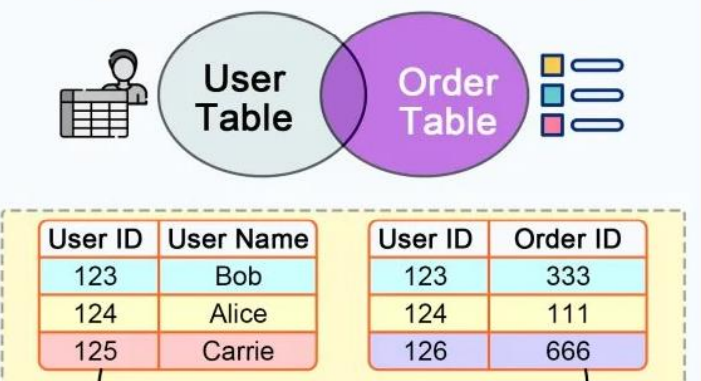

In [66]:
SELECT u.User_ID, u.User_Name, o.Order_ID
FROM esquema_join.Usuarios u
RIGHT JOIN esquema_join.Ordenes o
 ON u.User_ID = o.User_ID;

(3 row(s) affected)

Total execution time: 00:00:01.014

User_ID,User_Name,Order_ID
123,Bob,333
123,Bob,222
NULL,NULL,111


## **ESTE RESULTADO ES CON LOS MISMOS DATOS DE USUARIOS Y ORDENES DEL PRIMER CASO JOIN**

## **El MySQL no tiene soporte para el FULL OUTER JOIN, por eso se hizo UNION**

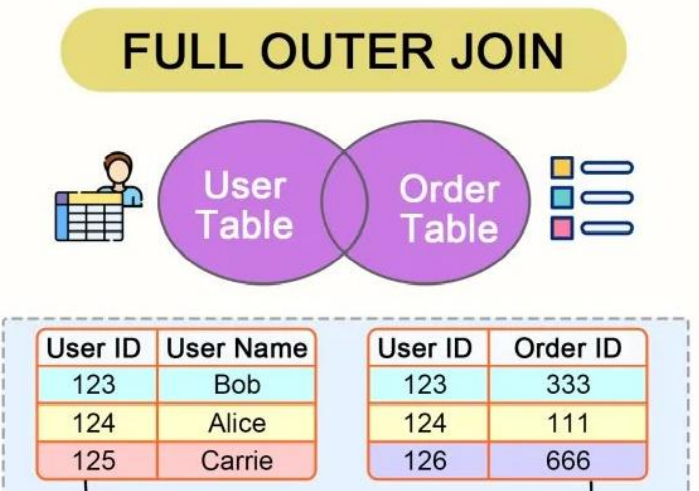

In [1]:
SELECT *
FROM esquema_join.Usuarios u 
LEFT OUTER JOIN esquema_join.Ordenes o
ON u.User_id = o.order_id
UNION
SELECT *
FROM esquema_join.Usuarios u
RIGHT OUTER JOIN esquema_join.Ordenes o 
ON u.user_id = o.order_id;

(6 row(s) affected)

Total execution time: 00:00:01.031

User_ID,User_Name,User_ID,Order_ID
123,Bob,NULL,NULL
124,Alice,NULL,NULL
125,Carrie,NULL,NULL
NULL,NULL,123,333
NULL,NULL,123,222
NULL,NULL,126,111


## **ESTE RESULTADO ES CON LOS MISMOS DATOS DE USUARIOS Y ORDENES DEL PRIMER CASO JOIN**